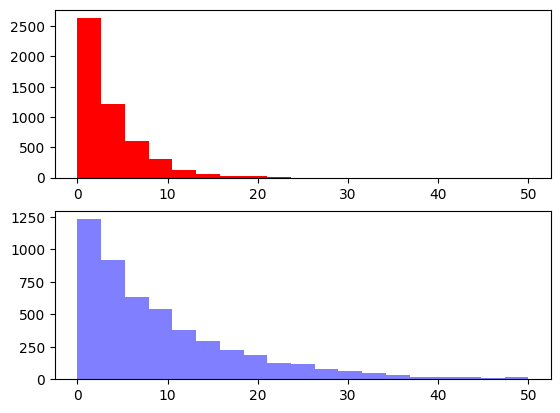

In [3]:
import numpy as np
import matplotlib.pyplot as plt
generator = np.random.Generator(np.random.PCG64(seed=123))
a = generator.exponential(scale = 3.59, size = 5000)
b = generator.exponential(scale = 10.0, size = 5000)
bins = np.linspace(0, 50, 20)
fig, axs = plt.subplots(2)
axs[0].hist(a, bins = bins, color = 'r')
axs[1].hist(b, bins = bins, color = 'b', alpha = 0.5)
fig.savefig('histogram.png')
plt.show()

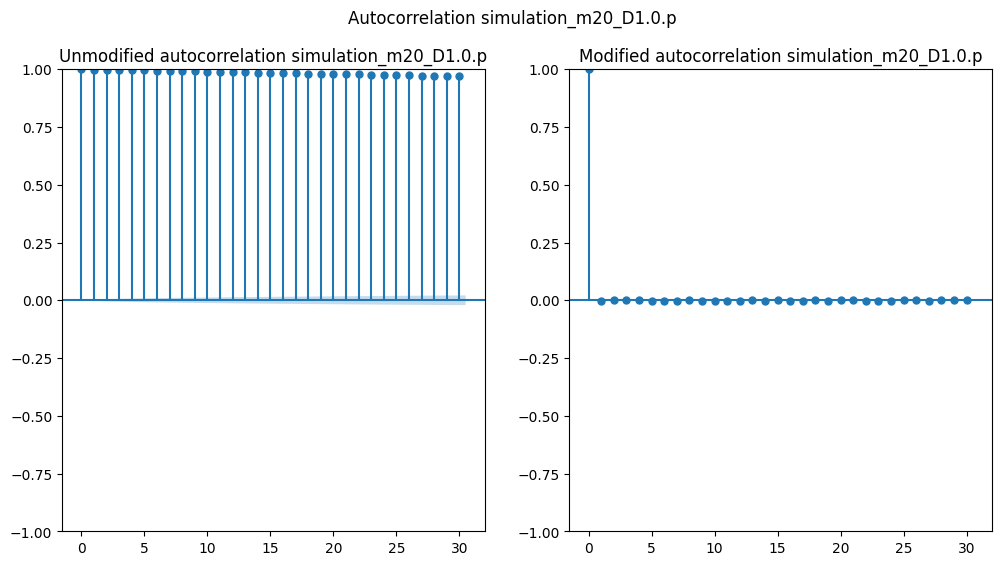

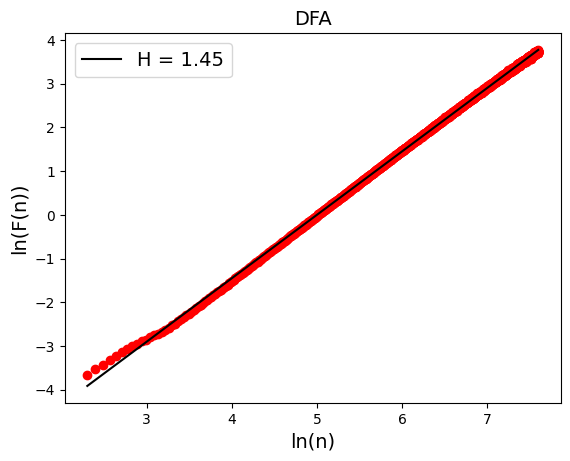

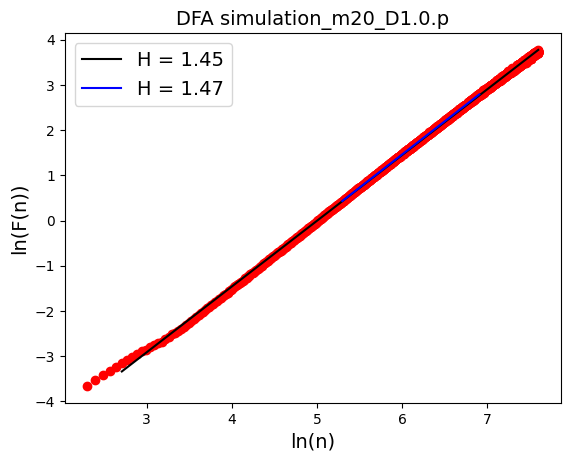

In [1]:
import pickle
import numpy as np
from monostable_model import calculate_autocorelation_acf, calculate_autocorelation_dfa
import matplotlib.pyplot as plt
file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))
calculate_autocorelation_acf(current['x'], title=file_name)
# fig.savefig('outputs/autocorrelation_acf_simulation_m20_D1.0.png')
calculate_autocorelation_dfa(current['x'], title=file_name)

178
179
True
0.044901089957896545


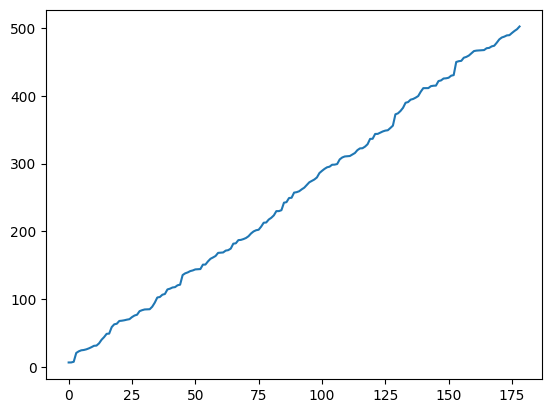

In [2]:
# plt.plot(current['x'][:50000])
plt.plot(current['dwell times'])
print(len(np.diff(current['dwell times'])))
print(len(current['dwell times']))
print(current['dwell times'][2] - current['dwell times'][1] == np.diff(current['dwell times'])[1])
print(current['dwell times'][1] - current['dwell times'][0])
plt.show()

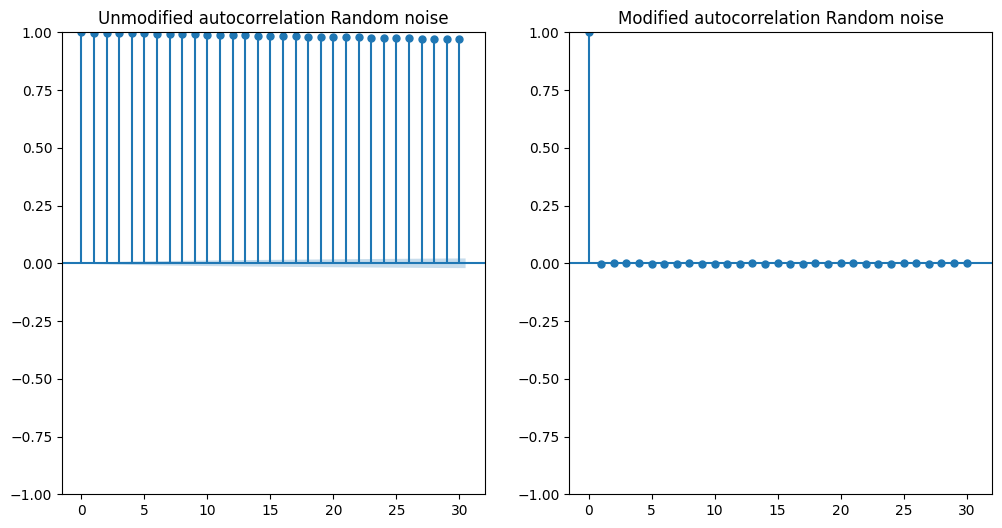

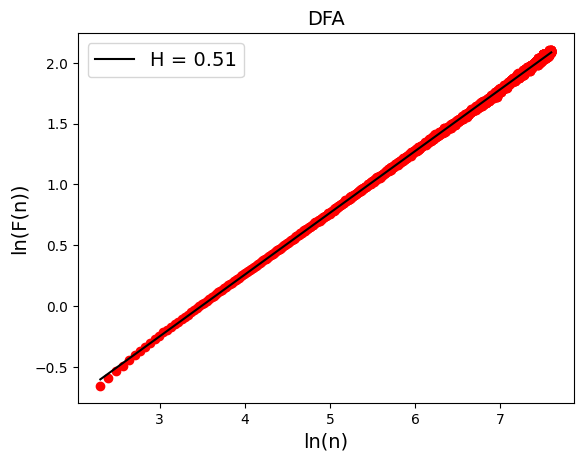

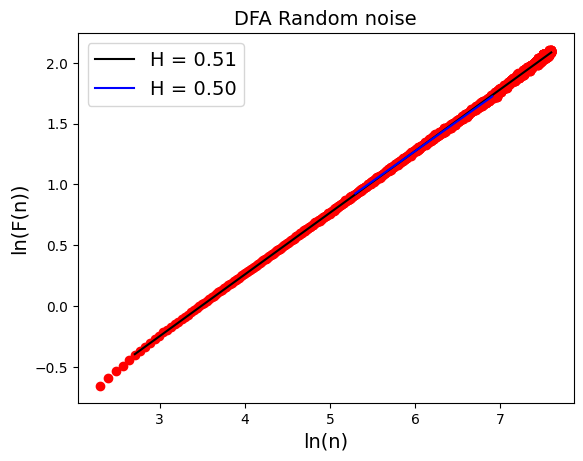

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from monostable_model import calculate_autocorelation_acf, calculate_autocorelation_dfa
data = np.random.normal(0, 1, 100000)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
calculate_autocorelation_acf(current['x'], fig, axs, title='Random noise')
calculate_autocorelation_dfa(data, title='Random noise')

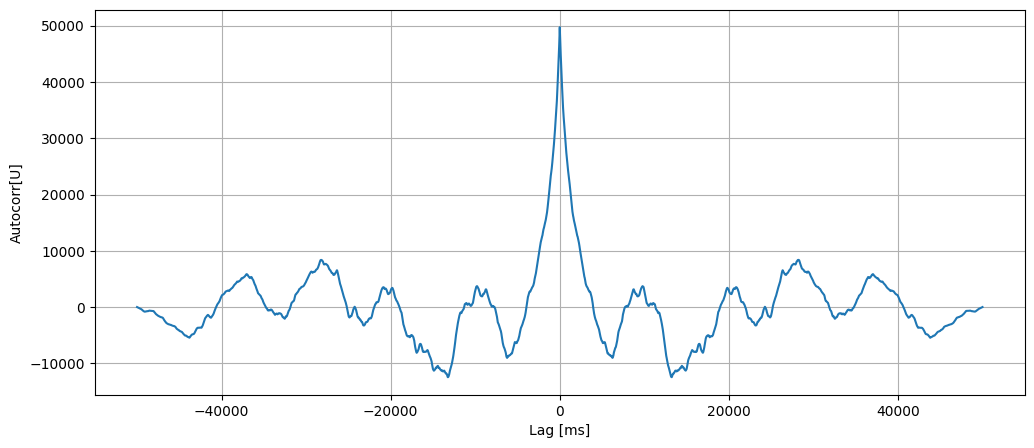

In [3]:
import pickle
import numpy as np
from monostable_model import calculate_autocorelation_acf, calculate_autocorelation_dfa
import matplotlib.pyplot as plt

def autocorr(x):
    return np.correlate(x, x, mode='full')

file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))

fig, ax = plt.subplots(figsize=(12., 5.))
U_autocorr = autocorr(current['x'][:50000])
lags = np.arange(len(U_autocorr)) - len(U_autocorr) / 2
ax.plot(lags, U_autocorr)
ax.set_xlabel("Lag [ms]")
ax.set_ylabel("Autocorr[U]")
ax.grid()